# Model 2 

In [1]:
import pandas as pd

In [2]:
yt = pd.read_csv("c://users//shrey//downloads//csv/Real estate.csv")

In [3]:
yt

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [4]:
df = yt

In [5]:
df.drop("No",axis = 1,inplace = True)

In [6]:
df.isna().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

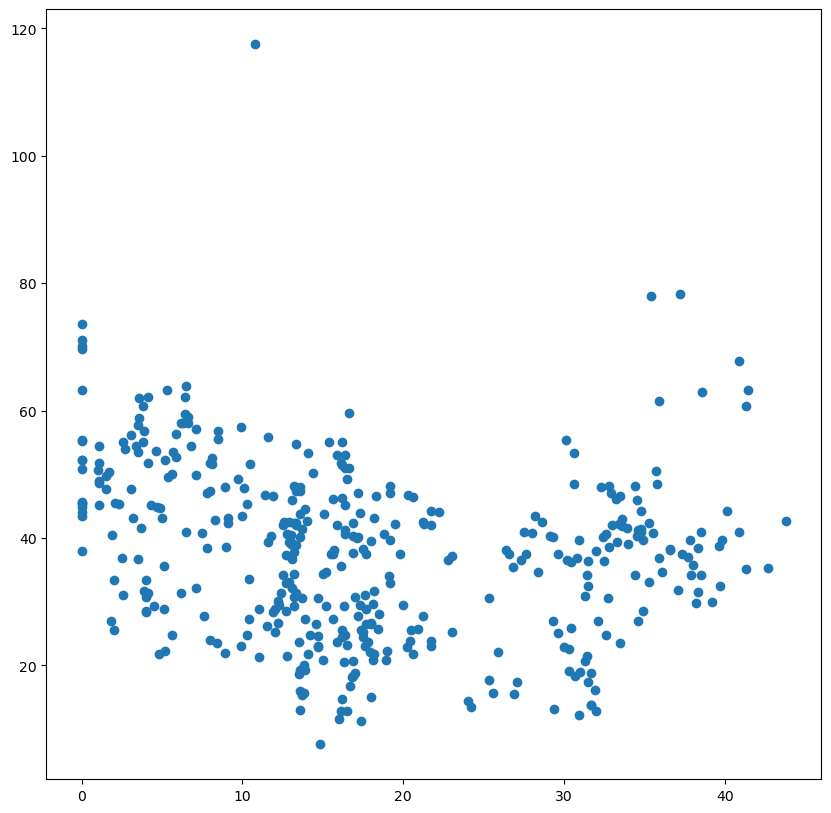

In [7]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize = (10,10))
ax.scatter(df["X2 house age"],df["Y house price of unit area"])

<Axes: ylabel='Frequency'>

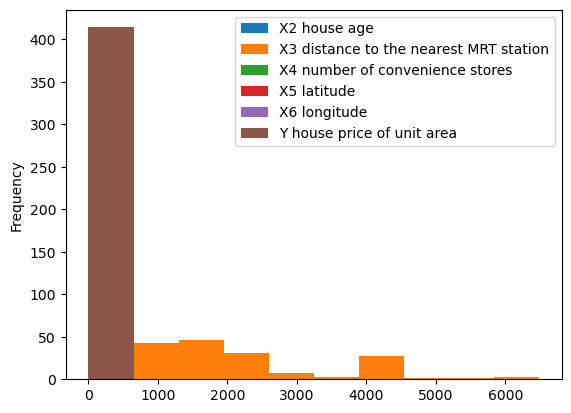

In [8]:
df.drop("X1 transaction date",axis = 1).plot.hist()

In [9]:
df.isna().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [10]:
# NOW THE HITCH IS THE TRANSACTION DATE

In [13]:
df["X1 transaction date"]=df["X1 transaction date"].astype("str")

In [14]:
# df['Sale Year'] = df['X1 transaction date'].str.extract(r'(\d{4})')


In [18]:
df["Sale Year"]

0      2012
1      2012
2      2013
3      2013
4      2012
       ... 
409    2013
410    2012
411    2013
412    2013
413    2013
Name: Sale Year, Length: 414, dtype: object

In [21]:
df['Sale year'] = df['X1 transaction date'].str[0:4]

<Axes: xlabel='Sale year'>

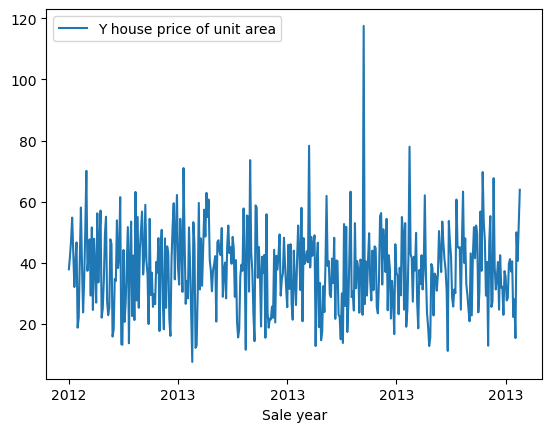

In [24]:
df.plot("Sale year","Y house price of unit area")

In [69]:
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor,GradientBoostingRegressor,RandomForestRegressor,StackingRegressor,VotingRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression

In [70]:
x = df.drop("Y house price of unit area",axis = 1)
y = df["Y house price of unit area"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [82]:
model_1 = AdaBoostRegressor()
model_2 = BaggingRegressor()
model_3,model_4,model_5 = ExtraTreesRegressor(),GradientBoostingRegressor(),RandomForestRegressor()

In [81]:
model_6 = LinearRegression()
model_7 = LogisticRegression()

In [93]:
model_1.fit(x_train,y_train)

AdaBoostRegressor()

In [94]:
model_2.fit(x_train,y_train)
model_3.fit(x_train,y_train)
model_4.fit(x_train,y_train)
model_5.fit(x_train,y_train)
model_6.fit(x_train,y_train)

LinearRegression()

In [96]:
print({"Linear Regression ": model_6.score(x_test,y_test)*100,
      " AdaBoostRegressor":model_1.score(x_test,y_test)*100,
       "BaggingRegressor": model_2.score(x_test,y_test)*100,
       "ExtraTreesRegressor":model_3.score(x_test,y_test)*100,
       "GradientBoostingRegressor":model_4.score(x_test,y_test)*100,
       "RandomForestRegressor":model_5.score(x_test,y_test)*100})

{'Linear Regression ': 60.694478644547246, ' AdaBoostRegressor': 73.67566221476186, 'BaggingRegressor': 67.86096966040019, 'ExtraTreesRegressor': 70.89437630042946, 'GradientBoostingRegressor': 68.56758440073065, 'RandomForestRegressor': 69.88953214061345}


In [42]:
# as we an see the accuracy is 0.7 which is practically acceptable but ig hyperparameter adjusting wud help
import numpy as np

In [45]:
param_grid = {
    'n_estimators': [10, 100, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [46]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV


In [50]:
rs_reg = RandomizedSearchCV(model_4,param_distributions=  param_grid,cv = 5,n_iter = 10,verbose=2,random_state=42)

In [51]:
rs_reg.fit(x_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10,

C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\shrey\anaconda3\Lib\site-packages\

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'max_depth': [None, 10, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 100, 500]},
                   random_state=42, verbose=2)

In [52]:
rs_reg.score(x_test,y_test)

0.6536541082410079

In [53]:
rs_reg.score(x_train,y_train)

0.7849820987516655

In [54]:
model_4.score(x_test,y_test)

0.713179306077997

as randomized search didnt work lets try gridsearchcv


In [55]:
gs_reg = GridSearchCV(model_4,param_grid=param_grid,cv = 5,verbose = 2,)

In [56]:
gs_reg.fit(x_train,y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_

C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\shrey\anaconda3\Lib\site-packa

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 100, 500]},
             verbose=2)

In [57]:
gs_reg.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 100, 500]},
             verbose=2)>

In [58]:
gs_reg.score(x_test,y_test)

0.7007791626928445

In [97]:
model_4.score(x_test,y_test)

0.6856758440073065

In [98]:
# the accuracy is 65-70 for all the algorithms so we can take mean of all to get the acuracy

In [99]:
## to find the accuracy lets use RMSE MAPE medianAPE

In [100]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,median_absolute_error

In [101]:
y_preds = model_4.predict(x_test)

In [103]:
mean_absolute_percentage_error(y_preds,y_test)

0.1201839328200245

In [104]:
np.sqrt(mean_squared_error(y_test,y_preds))

7.104008162305062

In [105]:
median_absolute_error(y_test,y_preds)

2.8545686782756334

# As the evaluating parameters shows decent values considered as above par we can conclude the model was a acceptable one

##  Thats all